# <span> Module 2: DNA Methylation Analysis <span>
## <span> Module Overview <span>

+ [Introduction](#IN)
+ [Raw Reads to Methylation Coverage File](#RR)
+ [Methylation Coverage to Differential Methylation ](#MC)


<span style="color:red">[**Methylation-Code-Overview.mp4 Placeholder**]</span>

## <span>**1. Introduction** <a name="IN"></a> </span>

### <span> What is Epigenetics? <span>
+ Changes in gene expression caused by mechanisms other than changes in the underlying DNA sequence.
+ Enables a cell/organism to respond to its dynamic external environment during development and throughout life.
+ Epigenetic changes to the genome can be inherited if these changes occur in cells giving rise to gametes.
    
### <span> Epigenetics Mechanisms <span>
+ DNA Methylation
+ Histone Modification
    
### <span> DNA Methylation <span> 
DNA Methylation is an epigenetic mechanism that can control gene regulation. Methylation involves the transfer of a methyl group and typically occurs at the CpG dinucleotides in vertebrates. The locations of methylated DNA, including hyper- and hypo- methylated DNA can give information on different diseases and allow researchers to predict and study these diseases. Bisulfite sequencing is a technique that can determine the patterns of DNA methylation. Bisulfite sequencing has a single-base resolution that allows researchers to study the methylation patterns at the base level. 

The addition of methyl groups to DNA, mostly CpG sites, is to convert cytosine to 5-methylcytosine. DNA methylation at promoter regions can impede target gene expression. CpG sites are regions of DNA where a cytosine nucleotide occurs next to a guanine nucleotide in the linear sequence of bases along its length. "CpG" stands for cytosine and guanine separated by a phosphate (—C—phosphate—G—), which links the two nucleosides together in DNA. Methyl groups attached to DNA affects accessibility of genes to transcription proteins. Highly methylated DNA stays tightly wound around histones, preventing RNA polymerase binding and gene transcription. Low methylation loosens the coils and make the DNA accessible to RNA polymerase, allowing gene transcription.

<figure>
<img src="../images/epigenetic-mech.jpeg" width="700" height="500">
<figcaption align = "center"> <b> Fig 1: Affect of epigenetic mechanisms on health. [1] </b> </figcaption>
    
</figure>
    
<div class="alert alert-block alert-warning">
    <i class="fa fa-pencil" aria-hidden="true"></i>
    <b>[1] Reference:</b> https://commonfund.nih.gov/epigenomics/figure </div>


### <span> DNA Methylation Flashcards <span>


In [1]:
IRdisplay::display_html('<iframe src = "../docs/quiz_files/methylation.html" width=95% height=600></iframe>')

### <span> Analysis Architecture for Differential Methylation Analysis <span>

<figure>
<img src="../images/methylation-flowchart.jpeg" width="700" height="500">
<figcaption align = "center"><b>Fig 2: Analysis Architecture for Differential Methylation Analysis. </b></figcaption>
</figure>  
  
This figure represents the analysis architecture followed in this module. The module has been designed according to the resources and the availability of data. The blue box represents the pipeline that can be implemented using the Nextflow nf-core/methylseq module. The purple box represents the data that can be directly extracted from GEO. Both the blue and purple boxes generate a methylation coverage file, and the user can implement either of the methods to generate gene counts and feed them to perform the further downstream analysis. However, Nextflow would take a lot of storage and processing power, so it is recommended to extract the data from GEO if available. If the required data is not available from GEO, then the Nextflow pipeline can be used to extract the gene counts. The downstream analysis is carried through using the R kernel of a Jupyter notebook, and all the steps are discussed in detail in this module.

## <span>**2. Raw Reads to Methylation Coverage File (Optional)** <a name="RR"></a> </span>
<figure>
<img src="../images/nfcore-methylseq.png" width="700" height="500">
<figcaption align = "center"><b>Fig 3: Flowchart for converting raw read to methylation coverage. </b></figcaption>
</figure>
    
This figure represents the analysis architecture followed in this module. The module has been designed according to the resources and the availability of data. The analysis steps represent the pipeline that can be implemented using the Nextflow nf-core/methylseq module. In this figure, the analysis steps to perform methyl seq are shown. Now, there are two different workflows that can be followed to implement this pipeline. The first one is Bismark workflow, where it shows all the tools which can be used for each step of the analysis. We have a similar tools list for each step for the bwa-meth workflow. Both of them are very popular workflows to implement methylseq pipeline.
    
The sample command to run nf-core methylseq pipeline to generate quality control reports and extract methylation call and coverage file is provided below. #### This step is <u>optional</u> as it is the preprocessing step to let you experience generating your own methylation coverage file. To save on computational and storage resources, we have already provided the methylation coverage file you will use in the down processing analysis in step 3. 
    
If you choose to generate your own methylation coverage file then refer to the instructions outlined in the RNAseq submodule, and refer to the nf-core [methylseq](https://nf-co.re/methylseq). Again, you will need to modify the config file to include your bucket and project ID. 

**The size of the output data generated by Nextflow is large we can mitigate that by storing the temporary and output files to a bucket by setting the 'workDir' and 'params.outdir' to a existing bucket:**
 
``` 
 workDir = 'gs://your_bucket_name/meth-tmp'
 params.outdir = 'gs://your_bucket_name/meth-outputs'
 ```

In [ ]:
#This step can take up to 20 min depending on the machine-type and input files.
system('../01-RNA-Seq/nextflow run nf-core/methylseq -c rrbs-gls.config -profile test,gls', intern=TRUE)

<div class="alert alert-block alert-info">
    <i class="fa fa-lightbulb-o" aria-hidden="true"></i>
    <b>Tip: </b> If you don't immediately see a output on your screen check your output directory you have pointed to in your config file to insure that Nextflow is running. You should see some output directories/files.
</div>

## <span>**3. Methylation Coverage to Differential Methylation** <a name="MC"></a> </span>

### <span> Install the required packages. </span>

In [2]:
# Intall r-base packages
packages <- c("ggplot2", "ggforce", "tidyverse")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’




In [3]:
# Install BiocManager if not already installed
if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

## Install Bioconductor packages.
packages <- c("methylKit", "GenomicRanges", "genomation")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  BiocManager::install(packages[!installed_packages])
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 (2022-10-31)

Installing package(s) 'methylKit'

also installing the dependencies ‘numDeriv’, ‘bdsmatrix’, ‘mvtnorm’, ‘coda’, ‘bbmle’, ‘R.oo’, ‘R.methodsS3’, ‘qvalue’, ‘emdbook’, ‘gtools’, ‘fastseg’, ‘mclust’, ‘R.utils’


Old packages: 'BiocManager', 'broom', 'cachem', 'data.table', 'dbplyr',
  'dplyr', 'dtplyr', 'fastmap', 'fontawesome', 'forcats', 'fs', 'future',
  'gargle', 'ggplot2', 'gh', 'h2o', 'haven', 'httpuv', 'httr', 'knitr',
  'lubridate', 'markdown', 'measurementProtocol', 'packrat', 'RcppTOML',
  'RCurl', 'readr', 'readxl', 'repr', 'reticulate', 'sourcetools', 'tidyr',
  'tidyverse', 'tinytex', 'utf8', 'xfun', 'boot', 'class', 'cluster',
  'codetools', 'foreign', 'MASS', 'Matrix', 'mgcv', 'nlme', 'spatial',
  'survival'



### <span> Load packages </span>

In [4]:
library("methylKit")
library("GenomicRanges")
library("genomation")

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: grid

Warning message:
“replacing previous import

### <span> Reading Methylation Call Files and Design Experiment</span>
The sample files are collected in an R list object and then loaded into methylKit using the methRead function. methRead loads all of the methylation files into a methylRawList object and sample location, IDs, assembly, treatment, and context should be supplied in this function

In [9]:
# download data files from storage bucket
system("gsutil -m cp gs://nigms-sandbox/nosi-und/RRBS/*.gz .", intern=TRUE)

file.list=list("GSM5266860_CD_NP1.txt.gz",
                "GSM5266861_CD_NP2.txt.gz",
                "GSM5266862_CD_NP3.txt.gz", 
                "GSM5266863_CD_P1.txt.gz", 
                "GSM5266864_CD_P2.txt.gz", 
                "GSM5266865_CD_P3.txt.gz", 
                "GSM5266866_BN_NP1.txt.gz", 
                "GSM5266867_BN_NP2.txt.gz",
                "GSM5266868_BN_NP3.txt.gz", 
                "GSM5266869_BN_P1.txt.gz",
                "GSM5266870_BN_P2.txt.gz",
                "GSM5266871_BN_P3.txt.gz")

character(0)

In [6]:
myobj=methRead(file.list,
               sample.id=list("CD_NP1","CD_NP2","CD_NP3","CD_P1","CD_P2","CD_P3","BN_NP1","BN_NP2","BN_NP3","BN_P1","BN_P2","BN_P3"),
               assembly="Rnor_6.0",
               treatment=c(0,0,0,0,0,0,1,1,1,1,1,1),
               context="CpG"
)

Received list of locations.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.

Uncompressing file.

Reading file.



<div class="alert alert-block alert-success">
    <i class="fa fa-hand-paper-o" aria-hidden="true"></i>
    <b>Note: </b>  If you've used Nextflow to produce your methylation coverage files and would like to use them for the down processing analysis instead of the test data provided enter your own files into the two previous code cells above with by copying them from the <b>bismark</b> subdirectory within your Nextflow outputs directory.
</div>

### <span> Data Filtration and Exploratory Analysis </span>
#### Descriptive Statistics
Once the data has been collected into a single object, we now look at the basic statistics for each sample. Basic statistics can include the percentage methylation and the coverage. Percentage methylation histograms normally have peaks on both of the distribution's ends. Within a cell, cytosines are either methylated or unmethylated. Using this knowledge, we can determine if there is a similar pattern between many cells for locations with high methylation, low methylation, and intermediate methylation. Typically, there should be a higher number of locations with high methylation and low methylation, and a lower number of locations with intermediate methylation. Bisulfite sequencing does have a relatively high error rate and because of this, samples between 0% and 10% are typically classified as "unmethylated" while samples between 90% and 100% are classified as "fully methylated", though these thresholds are not fixed.

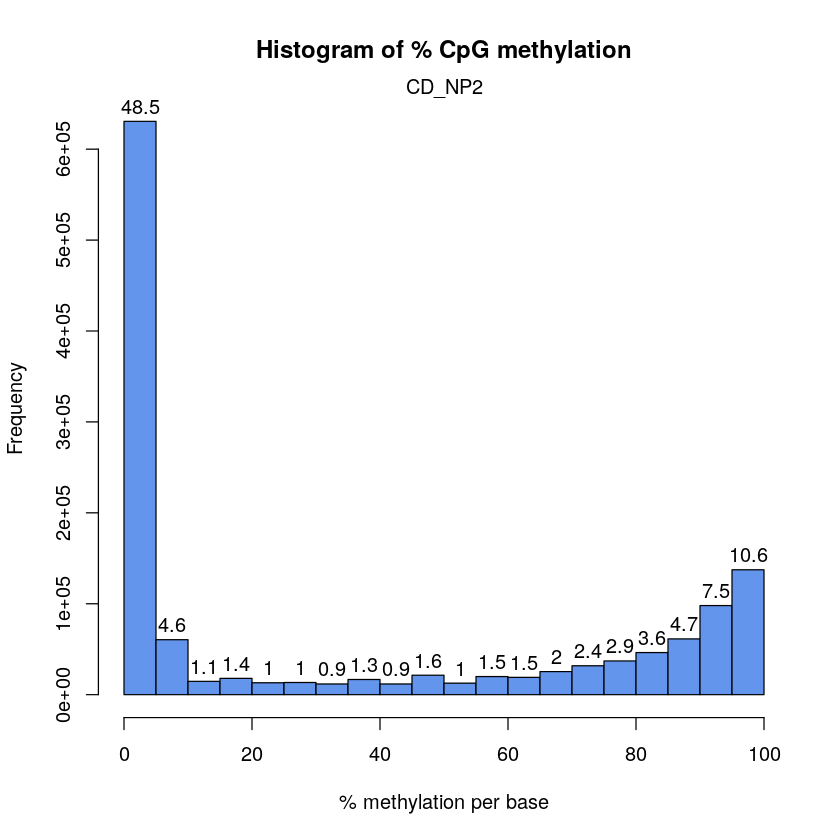

In [7]:
# Get a histogram of the methylation percentage per sample
# Here for sample 2
getMethylationStats(myobj[[2]],plot=TRUE,both.strands=FALSE)

Experiments that are suffering from PCR duplication bias will have a secondary peak towards the right hand side of the coverage histogram.

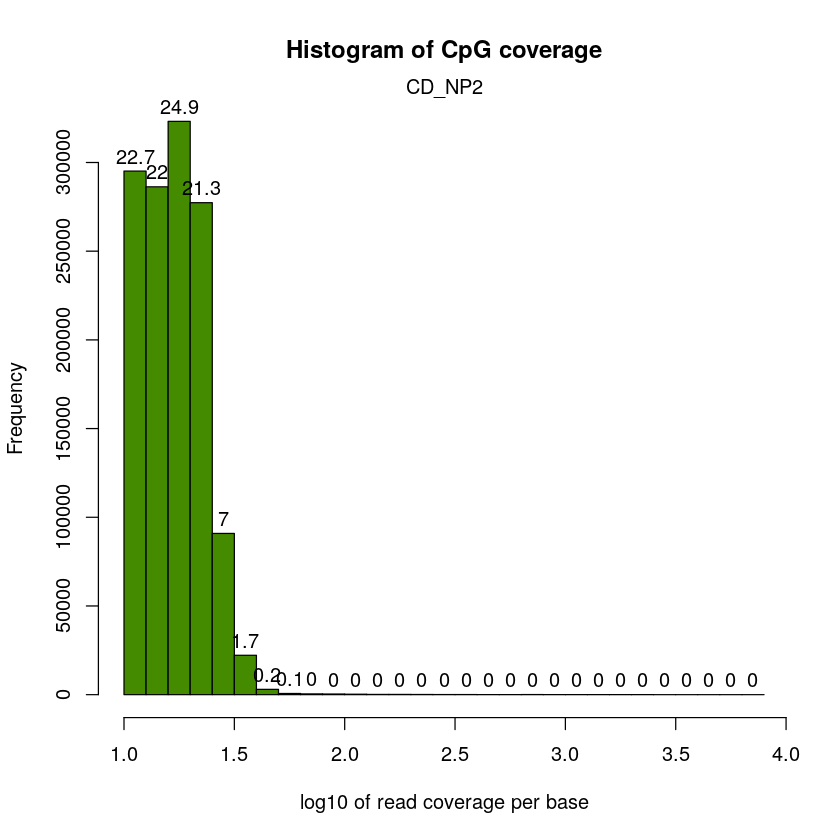

In [8]:
#Histogram of methylation coverage
getCoverageStats(myobj[[2]],plot=TRUE,both.strands=FALSE)

### Filter Step
Filtering samples based on coverage can often be useful. Specifically, if samples have overamplification or PCR bias, it can be useful to discard bases that have a very high read coverage. Bases with a very low read coverage should also be discarded because they tend to produce statistics that are unreliable and unstable in the downstream analyses. The code shown below filters a methylRawList and discards bases that have covereage below 10 reads, which was already done when the files were read in. Additionally, the code below discards bases with more than 99.9th percentile coverage in each sample.

In [10]:
filtered.myobj=filterByCoverage(myobj,lo.count=10,lo.perc=NULL,
                                      hi.count=NULL,hi.perc=99.9)

### <span> Normalization </span>
Basic normalization of the coverage values between samples can be performed using a scaling factor. This scaling factor is derived from differences in the median coverage distributions.

In [11]:
myobj.filt.norm <- normalizeCoverage(filtered.myobj, method = "median")

### Merging samples into a single table
Before further analysis can be performed, bases that are covered by the reads need to be extracted for all samples. The unite() function merges all of the samples into one object covering the base-pair locations in all samples. Setting destrand=TRUE (the default is FALSE) will merge reads on both strands of a CpG dinucleotide. This provides better coverage, but only advised when looking at CpG methylation.

In [12]:
## we use :: notation to make sure unite() function from only methylKit package is called
meth=unite(myobj.filt.norm, destrand=FALSE)

uniting...



In [13]:
# creates a methylBase object, where only CpGs covered with at least 1 sample per group will be returned
meth.min=unite(myobj,min.per.group=1L)

uniting...



### <span> Filtering CpGs </span>
Many CpG sites with little to no variation among study subject are often present in high-throughput methylation data, which is not very informative for downstream analyses. Standard deviation filtering of methylation ratio values (equivalent to Beta values), is the most commonly used and simple method. This method has been shown to be consistent and robust for use in different real datasets and on most occasions will suffice.

[1] 279693

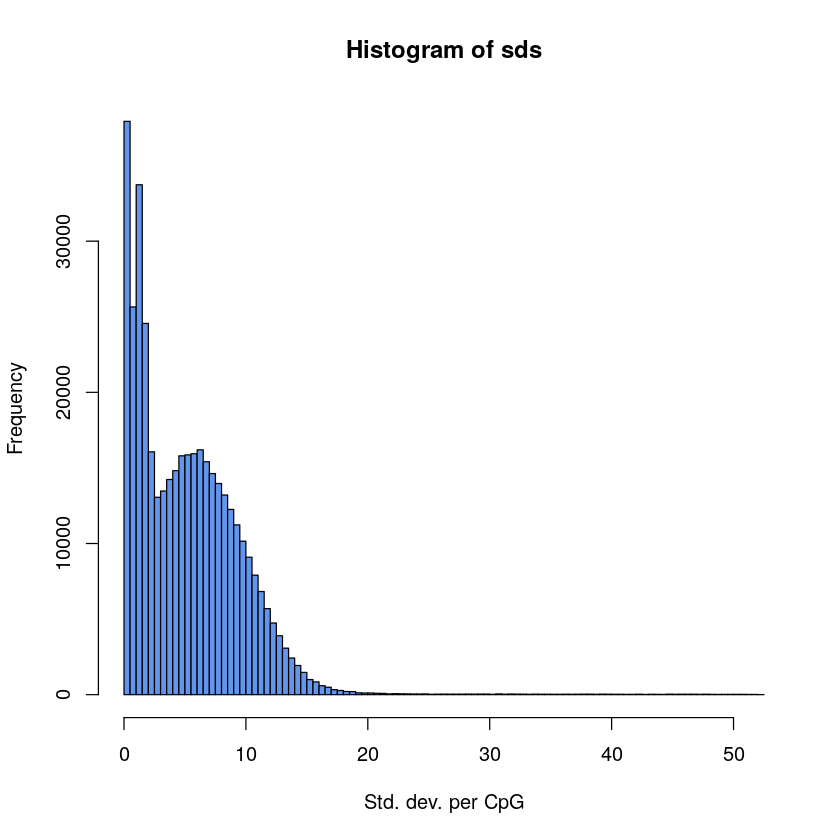

In [14]:
# get percent methylation matrix
pm=percMethylation(meth) 

# calculate standard deviation of CpGs
sds=matrixStats::rowSds(pm)

# Visualize the distribution of the per-CpG standard deviation
# to determine a suitable cutoff
hist(sds, breaks = 100, col="cornflowerblue", xlab="Std. dev. per CpG")

# keep only CpG with standard deviations larger than 2%
meth <- meth[sds > 2]

# Check the remaining number of CpGs
nrow(meth)

C -> T mutations can be further removed because they do not represent true bisulfite-treatment-associated conversions. We can store mutation locations in a GRanges object and we can use the object to remove the overlapping CpGs with the mutations. To perform the overlap operation, we convert the methylKit object to a GRanges object and perform filtering using the %over% function. This results in a returned methylKit object.

In [15]:
library(GenomicRanges)
# example SNP
mut=GRanges(seqnames=c("chr21","chr21"),
            ranges=IRanges(start=c(9853296, 9853326),
                           end=c( 9853296,9853326)))

# select CpGs that do not overlap with mutations
sub.meth=meth[! as(meth,"GRanges") %over% mut,]
nrow(meth)
nrow(sub.meth)

Warning message in .merge_two_Seqinfo_objects(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”


[1] 279693

[1] 279693

### <span> Data Structures and Outlier Detection </span>
We can check the correlation between samples using getCorrelation. This function will plot scatter plots with Pearson correlation coefficients.

          CD_NP1    CD_NP2    CD_NP3     CD_P1     CD_P2     CD_P3    BN_NP1
CD_NP1 1.0000000 0.9429322 0.9393896 0.9545651 0.9496622 0.9537955 0.9431714
CD_NP2 0.9429322 1.0000000 0.9348354 0.9468883 0.9406793 0.9472552 0.9348868
CD_NP3 0.9393896 0.9348354 1.0000000 0.9434569 0.9379306 0.9446626 0.9313662
CD_P1  0.9545651 0.9468883 0.9434569 1.0000000 0.9527448 0.9583672 0.9452511
CD_P2  0.9496622 0.9406793 0.9379306 0.9527448 1.0000000 0.9527320 0.9410739
CD_P3  0.9537955 0.9472552 0.9446626 0.9583672 0.9527320 1.0000000 0.9453692
BN_NP1 0.9431714 0.9348868 0.9313662 0.9452511 0.9410739 0.9453692 1.0000000
BN_NP2 0.9411480 0.9350668 0.9313835 0.9446171 0.9397409 0.9456399 0.9585034
BN_NP3 0.9446728 0.9374249 0.9337255 0.9472581 0.9424993 0.9477379 0.9617674
BN_P1  0.9381401 0.9311924 0.9275911 0.9412643 0.9362478 0.9414629 0.9548062
BN_P2  0.9360663 0.9282566 0.9243365 0.9385471 0.9339920 0.9388700 0.9529758
BN_P3  0.9376300 0.9309492 0.9273597 0.9409094 0.9359279 0.9415884 0.9546013

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

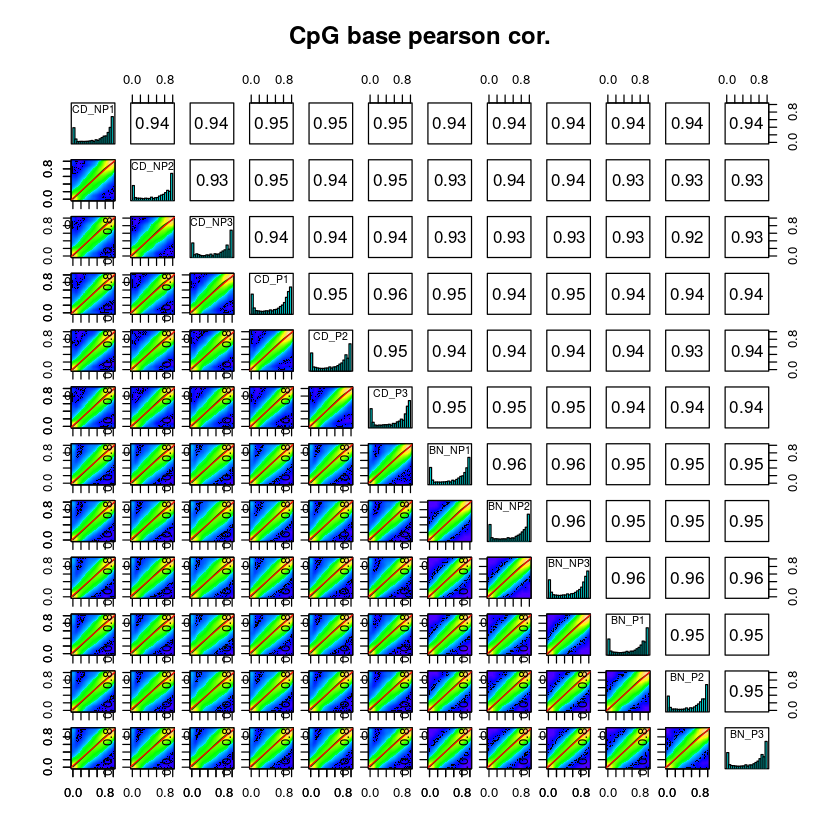

In [16]:
getCorrelation(meth,plot=TRUE)

### <span> Clustering Analysis </span>
The data structure can additionally be visualized in a dendrogram using hierarchical clustering of distance measures derived from each samples’ percentage methylation.


Call:
hclust(d = d, method = HCLUST.METHODS[hclust.method])

Cluster method   : ward.D2 
Distance         : pearson 
Number of objects: 12 


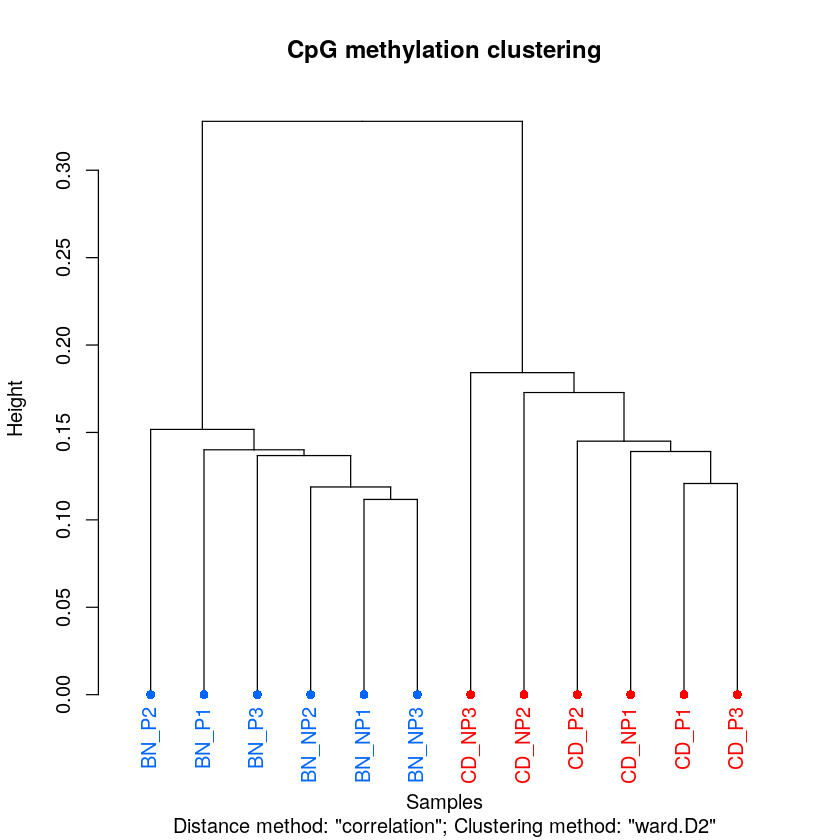

In [17]:
clusterSamples(meth, dist="correlation", method="ward.D2", plot=TRUE)

### <span> Principal Component Analysis </span>
We can also visualize the data through plotting the samples in a principal component space. Multidimensional data (i.e. we have as many dimensions in this data as there are CpG loci in meth) can be projected in into the PCA plot's 2- or 3- dimensional space, while maintaining as much variation as possible. In the PCA space, samples that are more alike will be clustered together, and with this plot we can identify the largest sources of variation in the data as well as if there are sample swaps or outlier samples.

Importance of components:
                           PC1     PC2     PC3      PC4      PC5      PC6
Standard deviation     18.9736 13.2285 12.7038 11.46751 11.34239 11.11261
Proportion of Variance  0.2237  0.1087  0.1003  0.08172  0.07994  0.07674
Cumulative Proportion   0.2237  0.3324  0.4327  0.51444  0.59438  0.67112
                            PC7      PC8      PC9     PC10    PC11      PC12
Standard deviation     10.88906 10.60826 10.28916 10.11330 9.48732 1.171e-14
Proportion of Variance  0.07368  0.06993  0.06579  0.06356 0.05593 0.000e+00
Cumulative Proportion   0.74480  0.81473  0.88051  0.94407 1.00000 1.000e+00

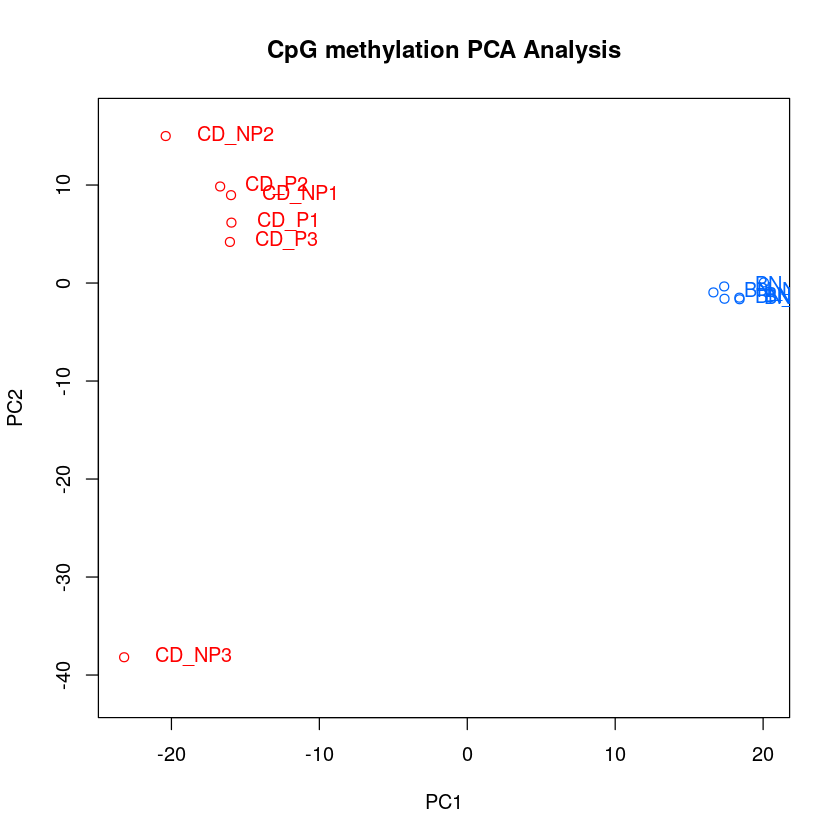

In [18]:
pc=PCASamples(meth,obj.return = TRUE, scale=FALSE, screeplot = FALSE, comp=c(1,2), transpose=TRUE)
summary(pc)

### <span> Differential Methylation </span>
### Single CpG Sites
Once we have confirmed that the basic statistics and data structures of the samples are reasonable, we can proceed to differential methylation. Differential DNA methylation is usually calculated by comparing the proportion of methylated Cs in a test sample relative to a control. The Fisher's Exact Test and similar methods can be applied when there are no replicates for the test and control cases. This can allow us to make simple comparisons between the pairs of samples such as the test and control. When replicates are present, regression based methods are typically used to model the methylation levels relative to the sample groups and variation between the replicates. Regression methods also have another additional advantage over the use of the Fisher's Exact test in that they all for the inclusion of sample specific covariates (categorical or continuous) as well as the ability to adjust for confounding variables. 

There are three options provided to get the differential methylation results namely Fisher’s Exact Test, Betabinomial Distribution Based Test, and Logistic Regression Based Test as you will see below. Only the Fisher’s exact test and the Logistic Regression based test will be explored. If you plan to use Betabinomial Distribution Based Test or compare the results of all three types of tests, the code can be uncommented. 

### Fisher’s Exact Test

In [ ]:
pooled.meth=pool(meth,sample.ids=c("test","control"))
dm.pooledf=calculateDiffMeth(pooled.meth)

In [ ]:
# get differentially methylated bases/regions with specific cutoffs
all.diff=getMethylDiff(dm.pooledf,difference=25,qvalue=0.01,type="all")

# get hyper-methylated
hyper=getMethylDiff(dm.pooledf,difference=25,qvalue=0.01,type="hyper")

# get hypo-methylated
hypo=getMethylDiff(dm.pooledf,difference=25,qvalue=0.01,type="hypo")

#using [ ] notation
hyper2=dm.pooledf[dm.pooledf$qvalue < 0.01 & dm.pooledf$meth.diff > 25,]

In [ ]:
head(dm.pooledf)
nrow(dm.pooledf)

In [ ]:
#Check the results
head(hyper)
nrow(hyper)
head(hypo)
nrow(hypo)

### Optional: Betabinomial-Distribution-Based Tests
The beta-binominal model for calculating the differential methylation can be accessed through the code below. This accounts for both sampling and epigenetic variablity, and is useful for better modeling of the variance. This model follows the binominal distribution of the number of reads which is similar to how logistic regression works. However, the beta distribution can have varying methylation proportions across samples.

If you plan to use Betabinomial Distribution Based Test or compare the results of all three types of tests, the code can be uncommented. 

In [ ]:
#dm.dss=calculateDiffMethDSS(meth)

### Logistic Regression Based Tests
The following code tests for the differential methylation of our dataset; i.e comparing methylation levels between two groups. If the data has replicates, logistic regression should be used.

In [19]:
# Test for differential methylation... This might take a few minutes.
dm.lr=calculateDiffMeth(meth,overdispersion = "MN",test ="Chisq")

two groups detected:
 will calculate methylation difference as the difference of
treatment (group: 1) - control (group: 0)



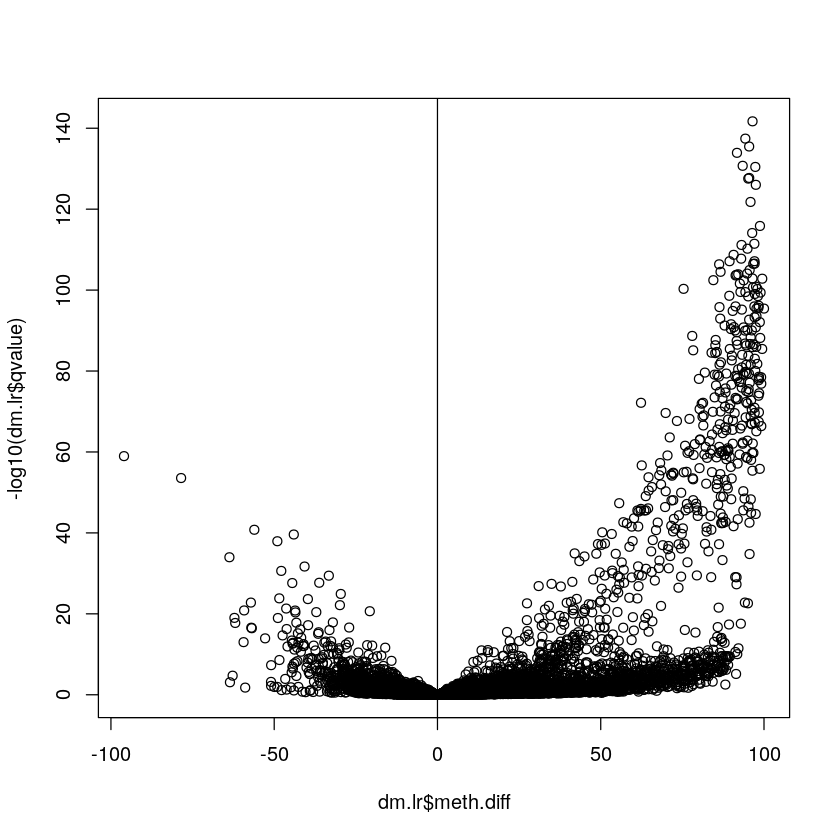

In [20]:
# Simple volcano plot to get an overview of differential methylation
plot(dm.lr$meth.diff, -log10(dm.lr$qvalue))
abline(v=0)

Next, we can visualize the number of hyper- and hypomethylation events per chromosome, as a percent of the sites with minimum coverage and minimal differential methylation. By default this is a 25% change in methylation and all samples with 10X coverage.

### <span> Explore Results </span>

Warning message in eval(quote(list(...)), env):
“NAs introduced by coercion”


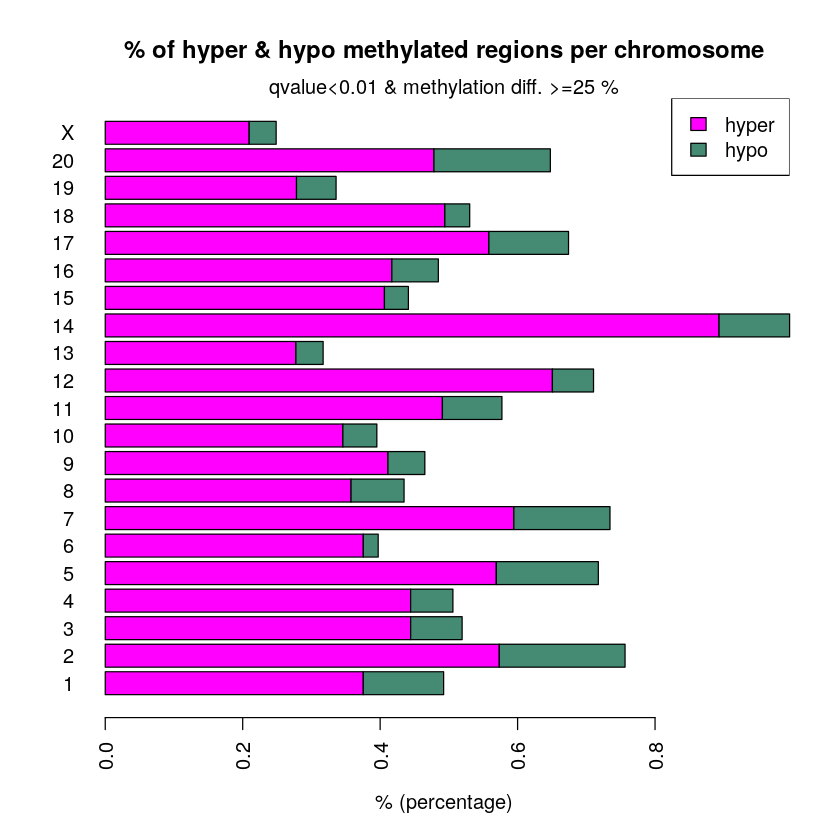

In [21]:
# Overview of percentage hyper and hypo CpGs per chromosome.
diffMethPerChr(dm.lr)

After q-value calculation, we can select the differentially methylated regions/bases based on q-value and percent methylation difference cutoffs of Treatment versus Control. The following bits of code selects the bases that have q-value < 0.01 and percent methylation difference larger than 25%. If you specify type="hyper" or type="hypo" options, you will extract the hyper-methylated or hypo-methylated regions/bases.

If necessary, covariates (such as age, sex, smoking status, …) can be included in the regression analysis. The function will then try to separate the influence of the covariates from the treatment effect via the logistic regression model.

In [22]:
# get hyper methylated bases and order by qvalue
myDiff25p.hyper <- getMethylDiff(dm.lr,
                              difference=25,
                              qvalue=0.01,
                              type="hyper")
myDiff25p.hyper <- myDiff25p.hyper[order(myDiff25p.hyper$qvalue),]

# get hypo methylated bases and order by qvalue
myDiff25p.hypo <- getMethylDiff(dm.lr,
                             difference=25,
                             qvalue=0.01,
                             type="hypo")
myDiff25p.hypo <- myDiff25p.hypo[order(myDiff25p.hypo$qvalue),]

# get all differentially methylated bases and order by qvalue
myDiff25p <- getMethylDiff(dm.lr,
                        difference=25,
                        qvalue=0.01)

#get all differentially methylated bases with pvalue < 0.05
myDiff25p <- getMethylDiff(dm.lr,
                        difference=25,
                        qvalue=0.01)

#Order by qvalue
myDiff25p <- myDiff25p[order(myDiff25p$qvalue),]


In [23]:
#Explore the results
head(dm.lr)
nrow(dm.lr)
head(myDiff25p.hyper)
nrow(myDiff25p.hyper)
head(myDiff25p.hypo)
nrow(myDiff25p.hypo)
head(myDiff25p)
nrow(myDiff25p)

,chr,start,end,strand,pvalue,qvalue,meth.diff
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1,41494,41494,+,0.69394049,0.9012299,-1.2024426
2,1,41543,41543,+,0.90841447,0.9345723,-0.5285226
3,1,109249,109249,-,0.48830702,0.8531403,2.8293461
4,1,179653,179653,-,0.09121573,0.5677682,5.2800609
5,1,179709,179709,-,0.94637774,0.9385599,-0.1074988
6,1,189399,189399,+,0.15943341,0.6668634,-2.8365098


[1] 279693

,chr,start,end,strand,pvalue,qvalue,meth.diff
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
80220,11,72429596,72429596,-,7.488553e-148,1.977761e-142,96.48532
172734,18,37241123,37241123,-,2.807180e-143,3.706945e-138,94.28535
262991,4,10929225,10929225,+,3.731042e-141,3.284617e-136,95.45455
151109,16,72437215,72437215,-,1.810753e-139,1.195570e-134,91.72149
151126,16,72508529,72508529,+,3.674288e-136,1.940792e-131,93.47055
109072,13,82841101,82841101,+,8.305044e-136,3.655667e-131,97.33840


[1] 1283

,chr,start,end,strand,pvalue,qvalue,meth.diff
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
203839,2,124792200,124792200,-,8.606347e-63,1.067125e-59,-96.00000
353995,7,140680094,140680094,-,2.501648e-57,2.764421e-54,-78.51349
203157,2,118784348,118784348,+,1.968713e-44,1.677245e-41,-56.09041
209632,2,194740269,194740269,+,2.985704e-43,2.487501e-40,-44.00319
109852,13,88536592,88536592,+,1.392143e-41,1.148973e-38,-49.03475
25607,1,191763569,191763569,+,1.345734e-37,1.042271e-34,-63.71865


[1] 248

,chr,start,end,strand,pvalue,qvalue,meth.diff
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
80220,11,72429596,72429596,-,7.488553e-148,1.977761e-142,96.48532
172734,18,37241123,37241123,-,2.807180e-143,3.706945e-138,94.28535
262991,4,10929225,10929225,+,3.731042e-141,3.284617e-136,95.45455
151109,16,72437215,72437215,-,1.810753e-139,1.195570e-134,91.72149
151126,16,72508529,72508529,+,3.674288e-136,1.940792e-131,93.47055
109072,13,82841101,82841101,+,8.305044e-136,3.655667e-131,97.33840


[1] 1531

### <span> CpG Annotation </span>
Annotation of the differentially methylated regions and bases using the genomation package can help with biological interpretation of the data. A common annotation task looks at where the CpGs of interest are relative to genes, gene parts, and regulatory regions. The code below shows an example of reading the gene annotation information from a BED file (Browser Extensible Data - file format containing genome coordinates and associated annotations), and the following annotation of the differentially methylated regions using genomation functions. This annotation file can be downloaded from the UCSC TableBrowser.

In [24]:
# download data files from storage bucket
system("gsutil cp gs://nigms-sandbox/nosi-und/RRBS/rn6_ensGene.bed .", intern=TRUE)


character(0)

In [25]:
# First load the annotation data; i.e the coordinates of promoters, TSS, intron and exons
gene.obj <- readTranscriptFeatures("rn6_ensGene.bed")

Reading the table...

Calculating intron coordinates...

Calculating exon coordinates...

Calculating TSS coordinates...

Calculating promoter coordinates...

Outputting the final GRangesList...




In [26]:
head(gene.obj)

GRangesList object of length 4:
$exons
GRanges object with 310574 ranges and 2 metadata columns:
           seqnames              ranges strand |     score                 name
              <Rle>           <IRanges>  <Rle> | <numeric>          <character>
       [1]     chr1 201055644-201055825      + |         1 ENSRNOT00000054937.5
       [2]     chr1 201143856-201143934      + |         2 ENSRNOT00000054937.5
       [3]     chr1 201164770-201164867      + |         3 ENSRNOT00000054937.5
       [4]     chr1 201183051-201188165      + |         4 ENSRNOT00000054937.5
       [5]     chr1 201225978-201226103      + |         5 ENSRNOT00000054937.5
       ...      ...                 ...    ... .       ...                  ...
  [310570]    chr20   56199207-56199332      + |         3 ENSRNOT00000085220.1
  [310571]    chr20   56198049-56198220      + |         1 ENSRNOT00000082897.1
  [310572]    chr20   56198436-56198532      + |         2 ENSRNOT00000082897.1
  [310573]    chr20   5

Annotate the results from the differentially methylated calls calculated. Some data wrangling is required to make the data compatible with the annotateWithGeneParts function. Here the chr is added to annotate the chromosome number and then the data is converted into a GRanger object.

In [27]:
anot.diff <- myDiff25p
anot.diff$chr <- sapply(anot.diff$chr, function(x) paste('chr', x, sep = ""))
head(anot.diff)
class(anot.diff)
anot.diff <- as(anot.diff,"GRanges")

,chr,start,end,strand,pvalue,qvalue,meth.diff
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
80220,chr11,72429596,72429596,-,7.488553e-148,1.977761e-142,96.48532
172734,chr18,37241123,37241123,-,2.807180e-143,3.706945e-138,94.28535
262991,chr4,10929225,10929225,+,3.731042e-141,3.284617e-136,95.45455
151109,chr16,72437215,72437215,-,1.810753e-139,1.195570e-134,91.72149
151126,chr16,72508529,72508529,+,3.674288e-136,1.940792e-131,93.47055
109072,chr13,82841101,82841101,+,8.305044e-136,3.655667e-131,97.33840


[1] "methylDiff"
attr(,"package")
[1] "methylKit"

The final data (anot.diff) is then used in the next step for annotation using annotateWithGeneParts function.

In [28]:
myDiff25p.all.anot <- annotateWithGeneParts(anot.diff, gene.obj)

In [29]:
# Summary of target set annotation
myDiff25p.all.anot

Summary of target set annotation with genic parts

Rows in target set: 1531

-----------------------

percentage of target features overlapping with annotation:



percentage of target features overlapping with annotation:

(with promoter > exon > intron precedence):



percentage of annotation boundaries with feature overlap:



summary of distances to the nearest TSS:





  promoter       exon     intron intergenic 
      7.25      10.52      34.29      53.76 
  promoter       exon     intron intergenic 
      7.25       6.79      32.20      53.76 
promoter     exon   intron 
    0.16     0.04     0.24 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      9    7750   20839   45687   48920 1339324 

,target.row,dist.to.feature,feature.name,feature.strand
,<int>,<dbl>,<chr>,<fct>
823,1,-20034,ENSRNOT00000090855.1,+
124,2,4687,ENSRNOT00000079585.1,-
670,3,66568,ENSRNOT00000078733.1,-
956,4,35330,ENSRNOT00000074449.1,+
956.1,5,106644,ENSRNOT00000074449.1,+
915,6,-83098,ENSRNOT00000003932.7,-


prom,exon,intron
0,0,0
0,0,1
0,0,1
0,0,0
0,0,0
0,0,0


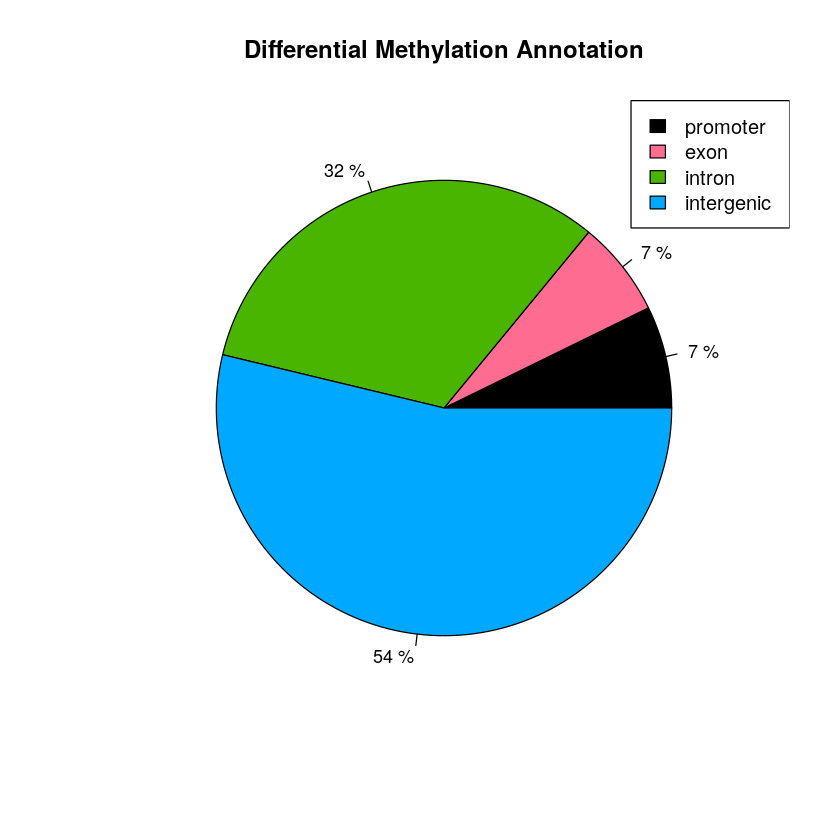

In [30]:
# View the distance to the nearest Transcription Start Site; the target.row column in the output indicates the row number in the initial target set
dist_tss <- getAssociationWithTSS(myDiff25p.all.anot)
head(dist_tss)

# See whether the differentially methylated CpGs are within promoters,introns or exons; the order is the same as the target set
head(getMembers(myDiff25p.all.anot))

# This can also be summarized for all differentially methylated CpGs
plotTargetAnnotation(myDiff25p.all.anot, main = "Differential Methylation Annotation")

### <span> (Optional) Make a dataframe with TSS, values and qvalues for future analysis. </span>

In [31]:
bs_results <- cbind(dist_tss, qvalue = anot.diff$qvalue, pvalue = anot.diff$pvalue)

### <span> (Optional) Write the Results to a Text File. </span>

In [32]:
#Write results to a text file. 
write.table(bs_results, "bs_results.txt", sep = "\t")

<hr style="border:2px solid Orange">

### <span> References and useful links </span>

- #### https://www.bioconductor.org/packages/release/bioc/vignettes/methylKit/inst/doc/methylKit.html#4_Annotating_differentially_methylated_bases_or_regions
- #### https://nbis-workshop-epigenomics.readthedocs.io/en/stable/content/tutorials/methylationSeq/Seq_Tutorial.html
- #### https://compgenomr.github.io/book/bsseq.html